<a href="https://colab.research.google.com/github/porfirioss/derivadas/blob/main/Aplicaciones_de_la_derivada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aplicaciones de la derivada
##Dr. Porfirio Suñagua S.

Manual de LaTeX
https://tecdigital.tec.ac.cr/servicios/revistamatematica/Libros/LaTeX/MoraW_BorbonA_LibroLaTeX.pdf

Teorema del valor intermedio

Para $f:[a,b]\to\mathbb{R}$ continua y supongamos que $f(a)<f(b)$, para cualquier $f(a)<d<f(b)$, existe un $c\in ]a,b[$ tal que $$f(c)=d$$

En particular, cuando $f(a)\cdot f(b)<0$, entonces, la ecuación $f(x)=0$ tiene solución en $a<x<b$

[-1, 1 - sqrt(2), 1 + sqrt(2)]
[2.00000000000000, 2.00000000000000, 2.00000000000000]
-2.4142135623730954


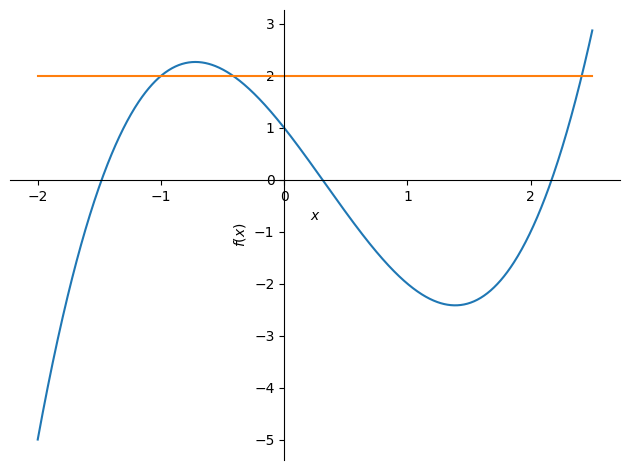

In [14]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.plotting import plot
x = sp.Symbol('x')
f = x**3-x**2 -3*x + 1
g = 2
fx = sp.lambdify(x, f, 'numpy')
eq = sp.Eq(f,g)
sol = sp.solve(eq,x)
print(sol)
print([fx(sp.N(sol[i])) for i in range(len(sol))])
print(fx(np.sqrt(2)))
plot(f,g,(x,-2,2.5))


In [16]:
def Biseccion(f,a,b,tol):
  if f(a)*f(b)>0:
    print("No hay raiz en el intervalo")
    return None
  m = (a+b)/2
  if abs(f(m))<tol:
    return m
  if f(a)*f(m)<0:
    return Biseccion(f,a,m,tol)
  else:
      return Biseccion(f,m,b,tol)

In [17]:
f = lambda x: x**3-x**2 -3*x + 1
print(Biseccion(fx,-2,2.5,0.0001))

-1.4812049865722656


In [19]:
def Newton(f,df,x0,tol):
  xn = x0
  for n in range(0,100):
    fxn = f(xn)
    if abs(fxn)<tol:
      print("Raiz encontrada")
      return xn
    dfxn = df(xn)
    if dfxn==0:
      print("División por cero")
      return None
    xn = xn - fxn/dfxn
  print("No se encontró la raiz en 100 iteraciones")
  return None

In [20]:
f = lambda x: x**3-x**2 -3*x + 1
df = lambda x: 3*x**2-2*x-3
print(Newton(f,df,-2,0.0001))

Raiz encontrada
-1.481194318866431


In [ ]:
%%capture
%matplotlib inline

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Latex, clear_output
import ipywidgets as widgets

def pendiente(a,b):
  if b==a:
    m=fdx(a)
  else:
    m = (fx(b)-fx(a))/(b-a)
  return m

def puntoTMV(f,a,b):
  m = pendiente(a,b)
  Df = sp.diff(f,x)
  xtvm = sp.solve(sp.Eq(Df,m),x)
  return xtvm[0]

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(6)
fig.set_figheight(4)
ax.grid(True,alpha=0.3)
x = sp.Symbol('x')
f = x**3-x**2 -3*x + 1
fx = sp.lambdify(x, f, 'numpy')
fd = sp.diff(f, x)
fdx = sp.lambdify(x, fd, 'numpy')
t = np.linspace(-2, 2.5)
ax.plot(t, fx(t),color='blue')
yx = fdx(1)*(x-1)+fx(1)
yt = sp.lambdify(x, yx, 'numpy')
line, = ax.plot(t, yt(t),color='green')
punto, = ax.plot(1,fx(1),'o',color='green',zorder=5)
#m = pendiente(1,1)

ptvm = puntoTMV(f,1,2)
puntotvm, = ax.plot(1,fx(1),'o',color='orange',zorder=5)
texto = ax.text(1,fx(1),rf"$\frac{{dy}}{{dx}}$={sp.latex(ptvm)}",color="green")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('center')
ax.spines['right'].set_position('center')
ax.spines['top'].set_position('center')
ax.spines['bottom'].set_position('center')

def rectaSecante(a,b,t):
  m = pendiente(a,b)
  yb = m*(x-a)+fx(a)
  ybt = sp.lambdify(x, yb, 'numpy')
  ybtt = ybt(t)
  return ybtt

ybtt = rectaSecante(1,2,t)
line2, = ax.plot(t, ybtt,color='red')
punto2, = ax.plot(2,fx(2),'o',color='red',zorder=5)
m = pendiente(1,2)
texto2 = ax.text(2,fx(2),rf"$\frac{{\Delta y}}{{\Delta x}}=${sp.latex(m)}",color="red")
# opacidad para las etiquetas
for tick_label in ax.get_xticklabels() + ax.get_yticklabels():
    tick_label.set_alpha(0.3)

def grafica(a,b):
    ptvm=puntoTMV(f,a,b)
    line.set_ydata(fdx(ptvm)*(t-ptvm)+fx(ptvm))
    punto.set_xdata([a])
    punto.set_ydata([fx(a)])
    puntotvm.set_xdata([ptvm])
    puntotvm.set_ydata([fx(ptvm)])
    m = pendiente(ptvm,ptvm)
    texto.set_x(ptvm)
    texto.set_y(fx(ptvm)+0.5)
    texto.set_text(rf"$\frac{{dy}}{{dx}}$={sp.latex(m)}")
    ybtt = rectaSecante(a,b,t)
    line2.set_ydata(ybtt)
    punto2.set_xdata([b])
    punto2.set_ydata([fx(b)])
    m = pendiente(a,b)
    texto2.set_x(b+0.25)
    texto2.set_y(fx(b)-0.5)
    texto2.set_text(rf"$\frac{{\Delta y}}{{\Delta x}}$={sp.latex(m)}")
    #ax.relim()
    ax.autoscale()
    display(fig)
    plt.close(fig) #clear_output(wait=True)


#Teorema del valor medio

In [ ]:
#ejecuta grafico intercativo
widgets.interact(grafica, a=(-2,2.5,0.01),b=(-2.0,2.5,0.01))

interactive(children=(FloatSlider(value=0.25, description='a', max=2.5, min=-2.0, step=0.01), FloatSlider(valu…

<function __main__.grafica(a, b)>

#Máximos y mínimos

In [15]:
#Utilizando función interna de la libreria de optimización
import numpy as np
from scipy.optimize import minimize_scalar

# 1. Definir la función y el intervalo
def f(x):
    return x**3 - 3*x + 2

# Función auxiliar para encontrar el MÁXIMO (minimiza -f(x))
def f_neg(x):
    return -f(x)

# Definir el intervalo [a, b]
a = -2.0
b = 2.5
intervalo = (a, b)

# Hallar el MÍNIMO en el intervalo [a, b]
res_min = minimize_scalar(f, bounds=intervalo, method='bounded')

# Hallar el MÁXIMO en el intervalo [a, b]
res_max = minimize_scalar(f_neg, bounds=intervalo, method='bounded')

# Mostrar los resultados
print(f"Función: f(x) en el intervalo [{a}, {b}]\n")

# Resultado del MÍNIMO
x_min = res_min.x
f_val_min = res_min.fun
print(f"Mínimo Global:")
print(f"  Valor de x: {x_min:.5f}")
print(f"  Valor de f(x): {f_val_min:.5f}")

# Resultado del MÁXIMO (el valor de res_max.fun es -Máximo)
x_max = res_max.x
f_val_max = -res_max.fun  # Se niega el resultado para obtener el valor de f(x) original
print(f"\nMáximo Global:")
print(f"  Valor de x: {x_max:.5f}")
print(f"  Valor de f(x): {f_val_max:.5f}")

Función: f(x) en el intervalo [-2.0, 2.5]

Mínimo Global:
  Valor de x: 1.00000
  Valor de f(x): 0.00000

Máximo Global:
  Valor de x: -1.00000
  Valor de f(x): 4.00000
